# Telecom project

## Project description

The telecom operator wants to learn how to predict customer churn. If it turns out that a user plans to leave they will be offered promotions and special conditions. The operator's team has collected personal data on some customers, information of their tariffs and contracts.

The operator provides two main types of services:
- Fixed-line telephone service.
It's possible to connect a telephone set to several lines simultaneously.
- Internet.
The connection can be of two types: DSL or fiber optic.

Others services available include:
- Internet security.
Antivirus (DeviceProtection) and blocking unsafe sites (OnlineSecurity).
- Technical support (TechSupport).
- Cloud storage for data backup (OnlineBackup).
- Streaming TV and streaming movies.

Customers can pay monthly or sign a contract for 1-2 years. Different payment methods are available, including electronic checks.

Data description

The data consists of files obtained from various sources:
- contract_new.csv - contract information
- personal_new.csv - personal data of customers
- internet_new.csv - Internet usage information
- phone_new.csv - telephone service information.

All data is linked by 'customerID' column.

The contract information is current as of February 1, 2020.

## Goals and objectives

The project's purpose is to create a model based on the input data that helps to predict customer churn, in order to take measures to prevent churn and not lose profit.

Tasks:
- Exploratory data analysis:
    - Data loading
    - Data overview (general information, columns names, data size, data types, checking of missing values)
    - Checking for duplicates.
- Data preprocessing:
    - Merging all tables into one common table
    - Normalizing data types
    - Filling in missing values
    - Exploring data correlations
    - Creating new features if necessary
    - Assigning target features
- Modeling:
    - Exploring various modeling algorithms
    - Selecting the best model based on perfomance metrics
    - Interpreting the selected model
- Applying the results to the business problem 

## Explorary Data Analysis

### Checking General Information

In [1]:
!pip install phik
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score
from catboost.utils import get_confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import phik

In [3]:
try:
    data_contract = pd.read_csv('/datasets/contract_new.csv')
    data_personal = pd.read_csv('/datasets/personal_new.csv')
    data_internet = pd.read_csv('/datasets/internet_new.csv')
    data_phone = pd.read_csv('/datasets/phone_new.csv')
except:
    data_contract = pd.read_csv('https://code.s3.yandex.net//datasets//contract_new.csv')
    data_personal = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')
    data_internet = pd.read_csv('https://code.s3.yandex.net//datasets//internet_new.csv')
    data_phone = pd.read_csv('https://code.s3.yandex.net//datasets//phone_new.csv')

#### Contract data

In [4]:
data_contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [5]:
data_contract['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [6]:
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [7]:
data_contract.duplicated().sum()

0

In [8]:
data_contract.duplicated(subset=['customerID']).sum()

0

In [9]:
for i in data_contract.columns[2:6]:
    print(i, data_contract[i].unique())

EndDate ['No' '2017-05-01' '2016-03-01' '2018-09-01' '2018-11-01' '2018-12-01'
 '2019-08-01' '2018-07-01' '2017-09-01' '2015-09-01' '2016-07-01'
 '2016-06-01' '2018-03-01' '2019-02-01' '2018-06-01' '2019-06-01'
 '2020-01-01' '2019-11-01' '2016-09-01' '2015-06-01' '2016-12-01'
 '2019-05-01' '2019-04-01' '2017-06-01' '2017-08-01' '2018-04-01'
 '2018-08-01' '2018-02-01' '2019-07-01' '2015-12-01' '2014-06-01'
 '2018-10-01' '2019-01-01' '2017-07-01' '2017-12-01' '2018-05-01'
 '2015-11-01' '2019-10-01' '2019-03-01' '2016-02-01' '2016-10-01'
 '2018-01-01' '2017-11-01' '2015-10-01' '2019-12-01' '2015-07-01'
 '2017-04-01' '2015-02-01' '2017-03-01' '2016-05-01' '2016-11-01'
 '2015-08-01' '2019-09-01' '2017-10-01' '2017-02-01' '2016-08-01'
 '2016-04-01' '2015-05-01' '2014-09-01' '2014-10-01' '2017-01-01'
 '2015-03-01' '2015-01-01' '2016-01-01' '2015-04-01' '2014-12-01'
 '2014-11-01']
Type ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mai

In [10]:
clients_out = data_contract['customerID'][data_contract['EndDate']!='No']
percent_out = len(clients_out) / len(data_contract['customerID'])
print(f'Customer churn rate: {percent_out:.2%}')

Customer churn rate: 15.63%


The data represents 7043 clients. No missing values or duplicates are present. 

We have 2 features that need to be converted in Datetime type. 
'TotalCharges' needs to be converted in float type.

I think it needs to create new feature of contract period.

#### Personal data

In [11]:
data_personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [12]:
data_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [13]:
for i in data_personal.columns[1:]:
    print(i, data_personal[i].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']


The data represents 7043 clients. No missing values or duplicates are present. The data consists of personal information in billing values.

#### Internet service data

In [14]:
data_internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [15]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [16]:
data_internet.duplicated().sum()

0

In [17]:
for i in data_internet.columns[1:]:
    print(i, data_internet[i].unique())

InternetService ['DSL' 'Fiber optic']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']


The data represents 5517 clients. No missing values or duplicates are present. The data consists of information in billing values. When merging tables, it will be necessary to fill missing values with 'No'.

#### Telephone service data

In [18]:
data_phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [19]:
data_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [20]:
data_phone.duplicated().sum()

0

In [21]:
data_phone['MultipleLines'].unique()

array(['No', 'Yes'], dtype=object)

The data represents 6361 clients. No missing values or duplicates are present. The data consists of information in billing values. When merging tables, it will be necessary to fill missing values with 'No'.

## Work plan

Data preprocessing:
- merge all tables into the final one using the 'CustomerID' column and fill the missing values
- change data types:
    - 'BeginDate' to datetime type
    - numerical features to numeric type
- create feature of contract period
- select 'EndDate' as the target feature, converting its values to 1 if the customer churnes and 0 otherwise
- explore feature correlations
- remove unnecessary features
- analyze feature distributions
- split the dataset into train and test sets in a 3:1 ratio
- perform feature encoding and scaling

Modeling:
- explore models - at least two different algorithms
- choose the best model, evaluating it using cross-validation (AUC-ROC)
- select the final model, ensuring its AUC-ROC score on the test set is not less than 0.85

Analyze the importance of features

Prepare the report on the work done

## Data Preprocessing

### Merging tables and filling missing values

In [22]:
data = data_personal.merge(
    data_contract, on='customerID', how='left').merge(
    data_internet, on='customerID', how='left').merge(
    data_phone, on='customerID', how='left')

In [23]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,Female,0,No,No,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Fiber optic,No,No,No,No,No,No,No


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


In [25]:
data = data.fillna('No')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  7043 non-null   object 
 16  TechSupport       7043 non-null   object 


### Change data types


#### Total charges 

In [27]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7032 non-null   float64
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  7043 non-null   object 
 16  TechSupport       7043 non-null   object 


In [29]:
data = data.fillna(0)

#### Begin contract date

In [30]:
data['BeginDate'] = pd.to_datetime(data['BeginDate'], format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   gender            7043 non-null   object        
 2   SeniorCitizen     7043 non-null   int64         
 3   Partner           7043 non-null   object        
 4   Dependents        7043 non-null   object        
 5   BeginDate         7043 non-null   datetime64[ns]
 6   EndDate           7043 non-null   object        
 7   Type              7043 non-null   object        
 8   PaperlessBilling  7043 non-null   object        
 9   PaymentMethod     7043 non-null   object        
 10  MonthlyCharges    7043 non-null   float64       
 11  TotalCharges      7043 non-null   float64       
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

### Create feature of contract period

In [31]:
data['Contract_period'] = data.query('EndDate != "No"')['EndDate']
data['Contract_period'] = data['Contract_period'].fillna('2020-02-01')

In [32]:
data['Contract_period'] = pd.to_datetime(data['Contract_period'], format='%Y-%m-%d %H:%M:%S')

In [33]:
data['Contract_period'] = (data['Contract_period'] - data['BeginDate']).dt.days

In [34]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,...,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,Contract_period
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,...,31.04,DSL,No,Yes,No,No,No,No,No,31
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,...,2071.84,DSL,Yes,No,Yes,No,No,No,No,1036
2,3668-QPYBK,Male,0,No,No,2019-10-01,No,Month-to-month,Yes,Mailed check,...,226.17,DSL,Yes,Yes,No,No,No,No,No,123
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),...,1960.60,DSL,Yes,No,Yes,Yes,No,No,No,1371
4,9237-HQITU,Female,0,No,No,2019-09-01,No,Month-to-month,Yes,Electronic check,...,353.50,Fiber optic,No,No,No,No,No,No,No,153


### Create feature target

In [35]:
data['EndDate'] = data['EndDate'].apply(lambda x: 0 if x=='No' else 1)

In [36]:
data = data.drop(columns=['BeginDate'])

No need 'BeginDate' anymore

### Explore class propotions

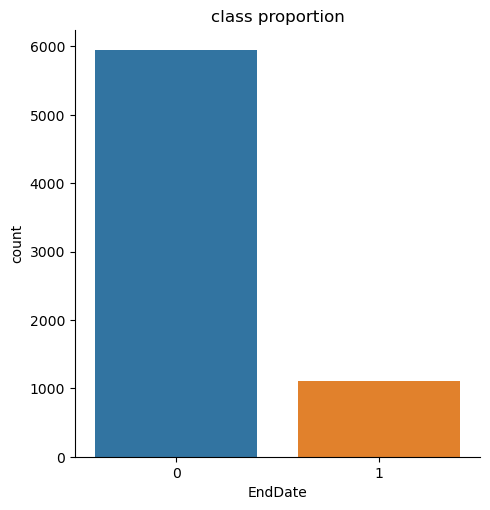

In [37]:
ax = sns.catplot(x='EndDate', kind='count', data=data)
plt.title('class proportion')
plt.show()

In [38]:
class_0 = data['EndDate'][data['EndDate']==0].count() / data['EndDate'].count()
class_1 = data['EndDate'][data['EndDate']==1].count() / data['EndDate'].count()

In [39]:
print(f'class proportion 1 to 0: {class_1:.0%} / {class_0:.0%}')

class proportion 1 to 0: 16% / 84%


There is imbalance, with customer churn accounting for 16%. No special actions are taking to address this imbalance, as we will use the AUC-ROC metric, which is insensitive to imbalance

### Feature distribution

#### Numerical features

In [40]:
def num_plot(feature, width):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, x=feature, hue='EndDate', element='step', stat='density', common_norm=False, binwidth=width)
    plt.show() 

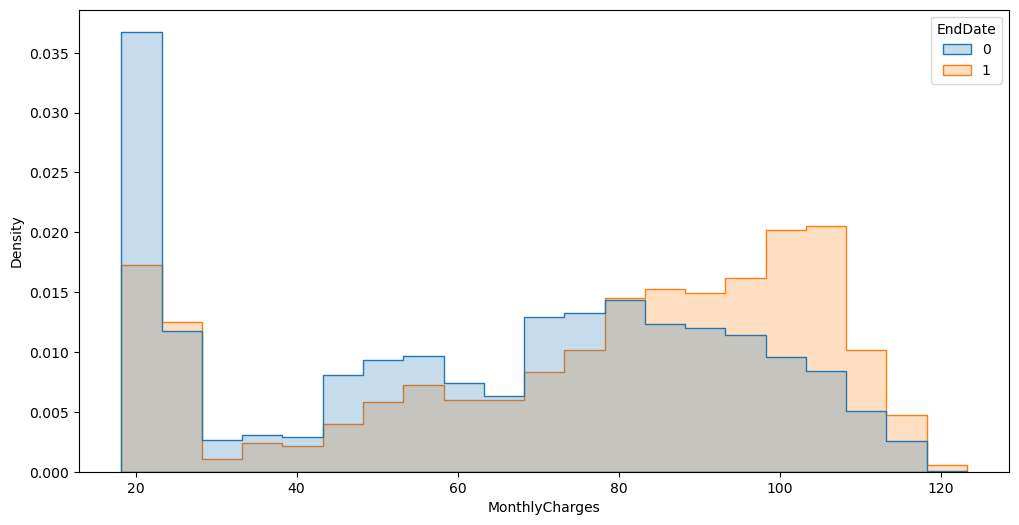

In [41]:
num_plot('MonthlyCharges', 5)

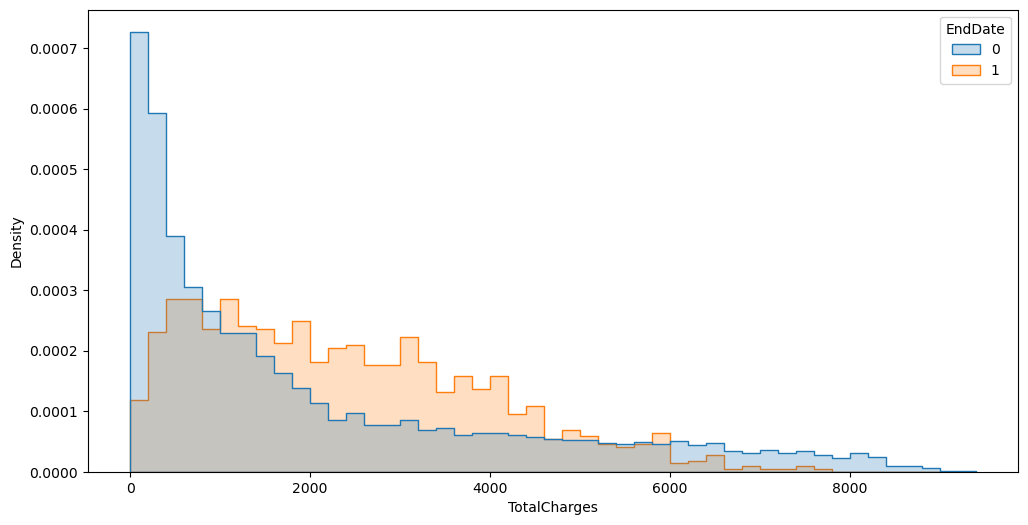

In [42]:
num_plot('TotalCharges', 200)

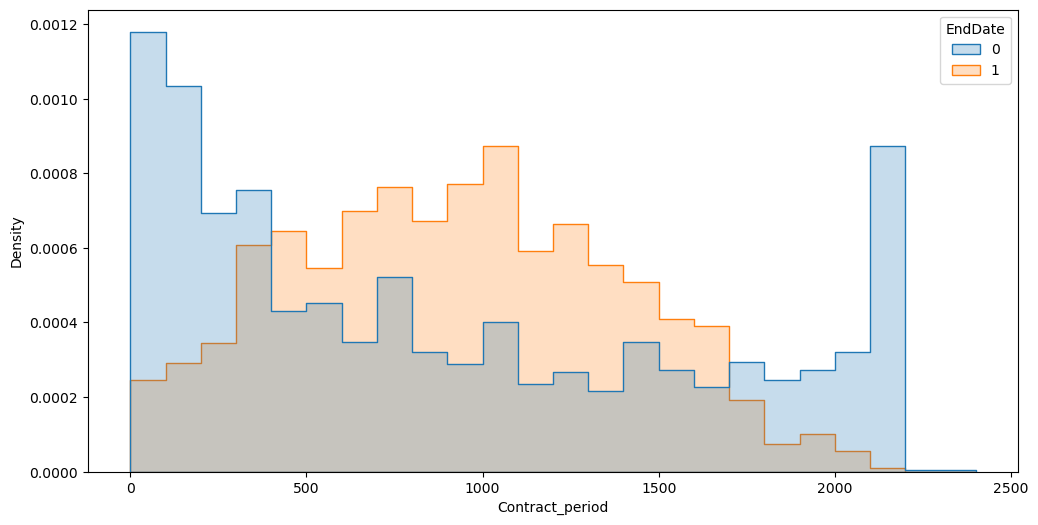

In [43]:
num_plot('Contract_period', 100)

On the graph we can determine the ranges of higher customer churn:
  - monthly payment: starting form 80
  - total payment: from 1000 to 5000
  - contract period: from 400 to 1700

#### Categorical features distribution

In [44]:
def cat_plot(feature):
    plt.figure(figsize=(6, 6))
    sns.barplot(data=data, x=feature, y='EndDate', ci=None)
    plt.axhline(data['EndDate'].mean(), color='red', linestyle='--')
    plt.show()

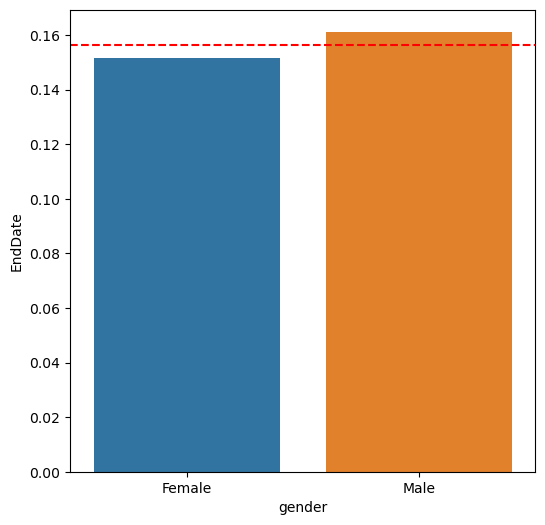

In [45]:
cat_plot('gender')

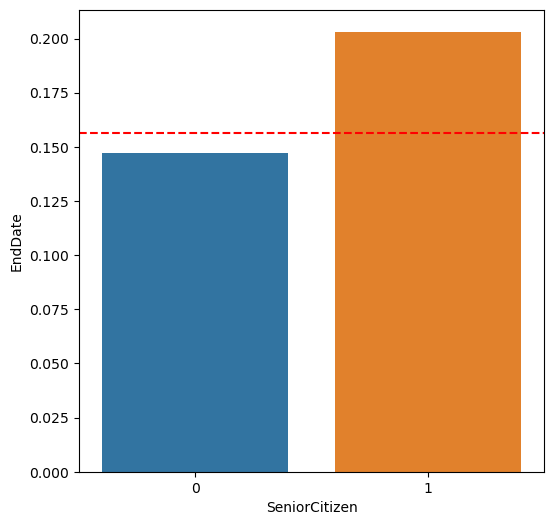

In [46]:
cat_plot('SeniorCitizen')

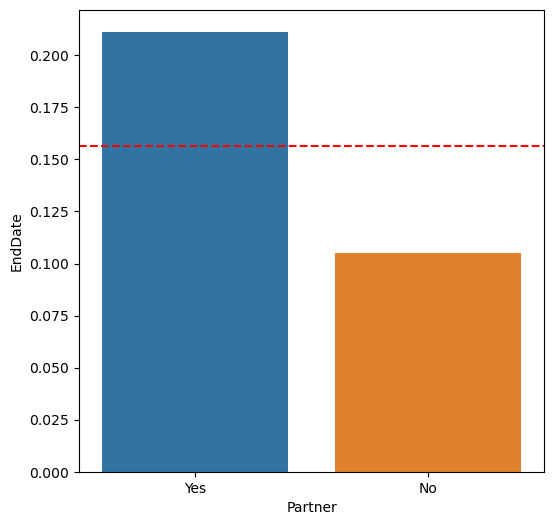

In [47]:
cat_plot('Partner')

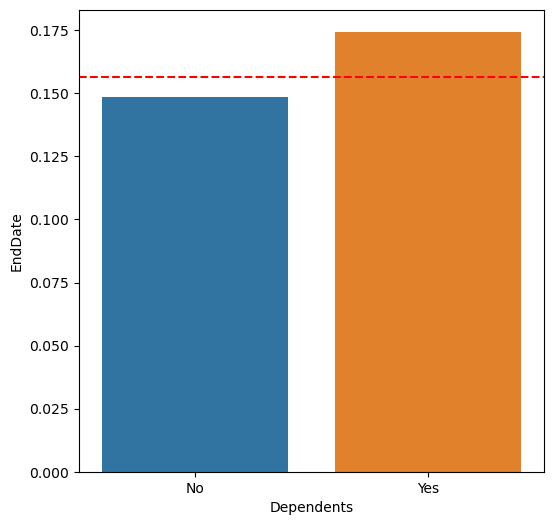

In [48]:
cat_plot('Dependents')

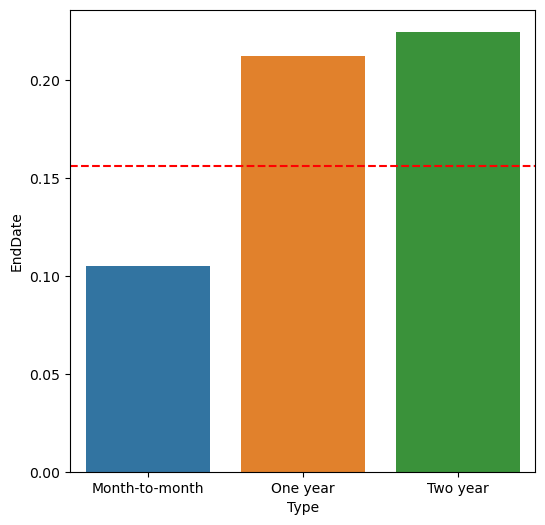

In [49]:
cat_plot('Type')

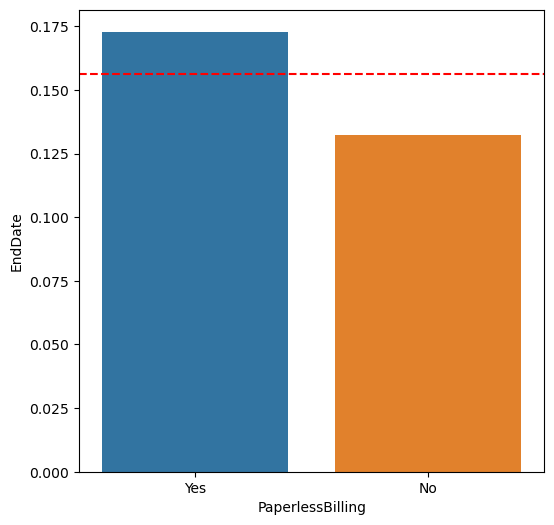

In [50]:
cat_plot('PaperlessBilling')

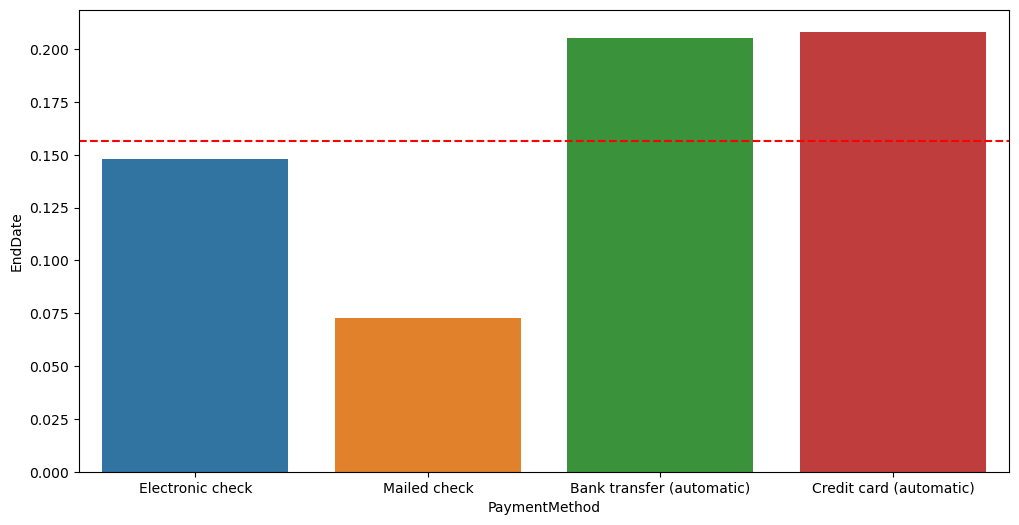

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='PaymentMethod', y='EndDate', ci=None)
plt.axhline(data['EndDate'].mean(), color='red', linestyle='--')
plt.show()

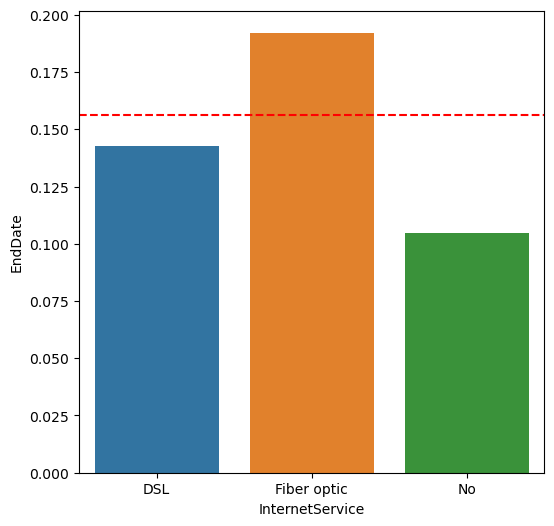

In [52]:
cat_plot('InternetService')

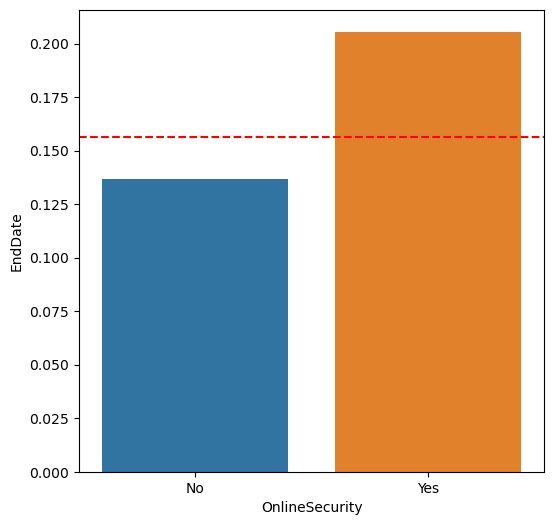

In [53]:
cat_plot('OnlineSecurity')

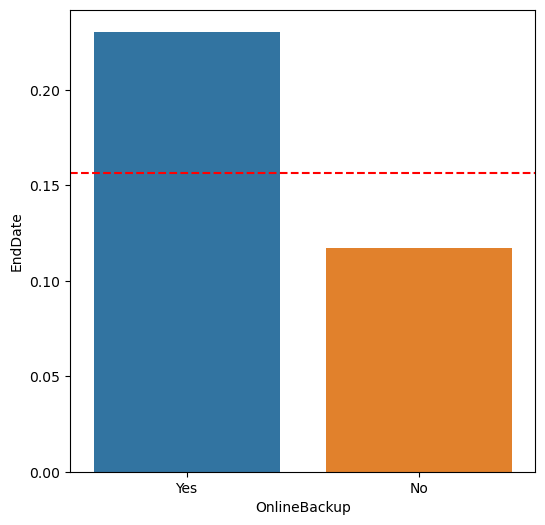

In [54]:
cat_plot('OnlineBackup')

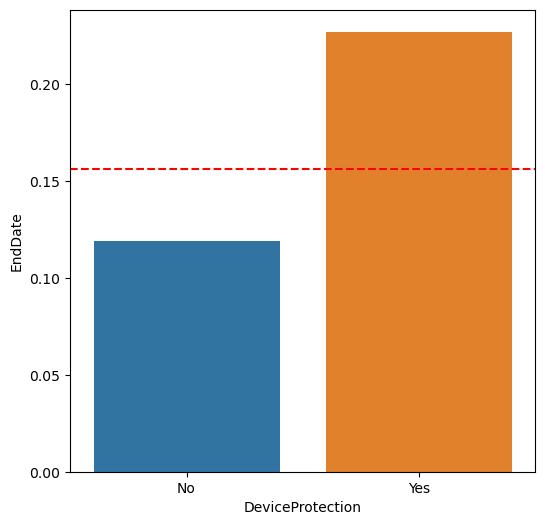

In [55]:
cat_plot('DeviceProtection')

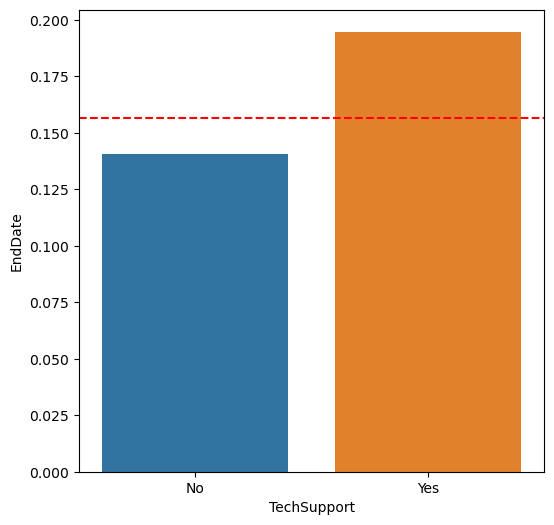

In [56]:
cat_plot('TechSupport')

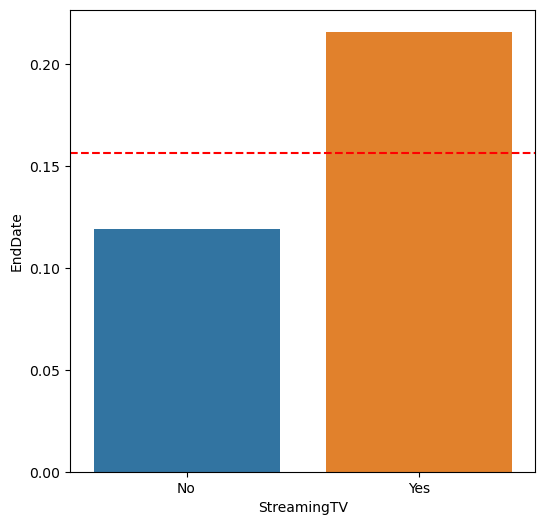

In [57]:
cat_plot('StreamingTV')

Равное сооношение среди ушедших клиентов

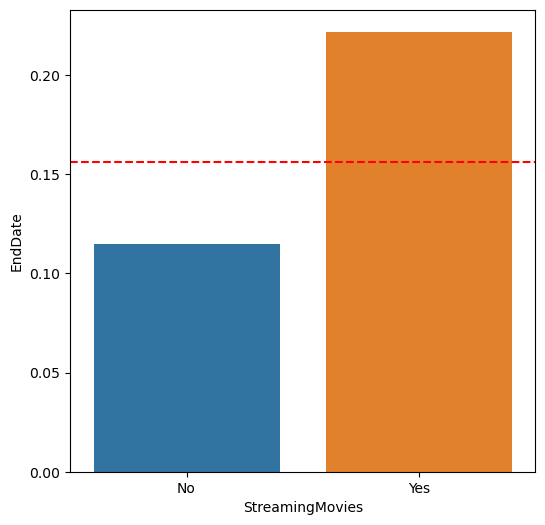

In [58]:
cat_plot('StreamingMovies')

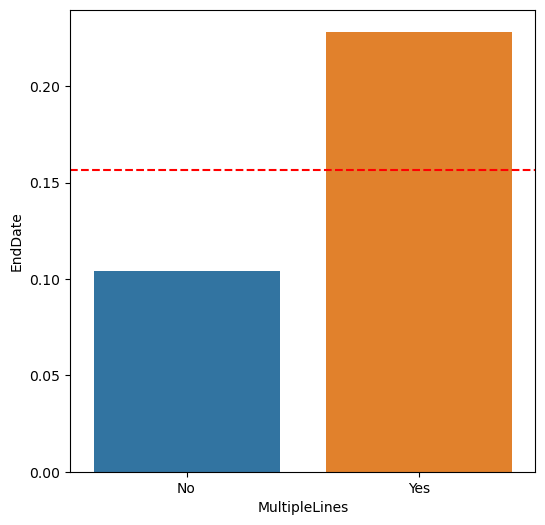

In [59]:
cat_plot('MultipleLines')

Let's note the features there is a significant difference in the propotion of churned customers:
- marital status (more churn among married)
- payment type (one/two years)
- payment method (bank transfres)
- connection type (fiber optic)
- Internet, TV and phone services (more churn among those with additional services)


#### Churn profile

In [60]:
data_0 = data[data['EndDate'] == 0]
data_1 = data[data['EndDate'] == 1]

In [61]:
result = {
    'Churn': 
        [data_1['MonthlyCharges'].mean(), 
         data_1['TotalCharges'].mean(), 
         data_1['Contract_period'].mean()],
    'Not churn': 
        [data_0['MonthlyCharges'].mean(), 
         data_0['TotalCharges'].mean(), 
         data_0['Contract_period'].mean()]
}
result_df = pd.DataFrame(result, index=['MonthlyCharges', 'TotalCharges','Contract_peiod'])
result_df['Relative difference'] = (result_df['Churn'] - result_df['Not churn']) / result_df['Not churn']
result_df

,Churn,Not churn,Relative difference
MonthlyCharges,75.546004,62.763455,0.203662
TotalCharges,2371.377275,2067.866420,0.146775
Contract_peiod,924.863760,893.681084,0.034892


In [62]:
result = {
    'Churn': 
        [data_1['gender'].mode()[0], 
         data_1['SeniorCitizen'].mode()[0], 
         data_1['Partner'].mode()[0],
         data_1['Dependents'].mode()[0],
         data_1['Type'].mode()[0],
         data_1['PaperlessBilling'].mode()[0],
         data_1['PaymentMethod'].mode()[0],
         data_1['InternetService'].mode()[0],
         data_1['OnlineSecurity'].mode()[0],
         data_1['OnlineBackup'].mode()[0],
         data_1['DeviceProtection'].mode()[0],
         data_1['TechSupport'].mode()[0],
         data_1['StreamingTV'].mode()[0],
         data_1['StreamingMovies'].mode()[0],
         data_1['MultipleLines'].mode()[0]],
    'Not churn': 
        [data_0['gender'].mode()[0], 
         data_0['SeniorCitizen'].mode()[0], 
         data_0['Partner'].mode()[0],
         data_0['Dependents'].mode()[0],
         data_0['Type'].mode()[0],
         data_0['PaperlessBilling'].mode()[0],
         data_0['PaymentMethod'].mode()[0],
         data_0['InternetService'].mode()[0],
         data_0['OnlineSecurity'].mode()[0],
         data_0['OnlineBackup'].mode()[0],
         data_0['DeviceProtection'].mode()[0],
         data_0['TechSupport'].mode()[0],
         data_0['StreamingTV'].mode()[0],
         data_0['StreamingMovies'].mode()[0],
         data_0['MultipleLines'].mode()[0]]
}
result_df = pd.DataFrame(result, index=data.
                         drop(['customerID','EndDate','MonthlyCharges', 'TotalCharges', 'Contract_period'], axis=1).
                         columns)
result_df

,Churn,Not churn
gender,Male,Male
SeniorCitizen,0,0
Partner,Yes,No
Dependents,No,No
Type,Month-to-month,Month-to-month
PaperlessBilling,Yes,Yes
PaymentMethod,Electronic check,Electronic check
InternetService,Fiber optic,Fiber optic
OnlineSecurity,No,No
OnlineBackup,Yes,No


Приблизительный портрет клиента, готовящегося уйти:
- состоящий в браке, 
- предпочитающий годовой/двухгодовой способ оплаты, 
- в среднем платящий больше,
- имеющий всевозможные доролнительные услуги.

Approximate churn profile:
- married
- prefers one/two-years payment methods
- pays more on average
- has all additional services

### Correlation

In [63]:
coll_matrix = data.drop('customerID', axis=1).phik_matrix(interval_cols=['MonthlyCharges','TotalCharges','Contract_period'])

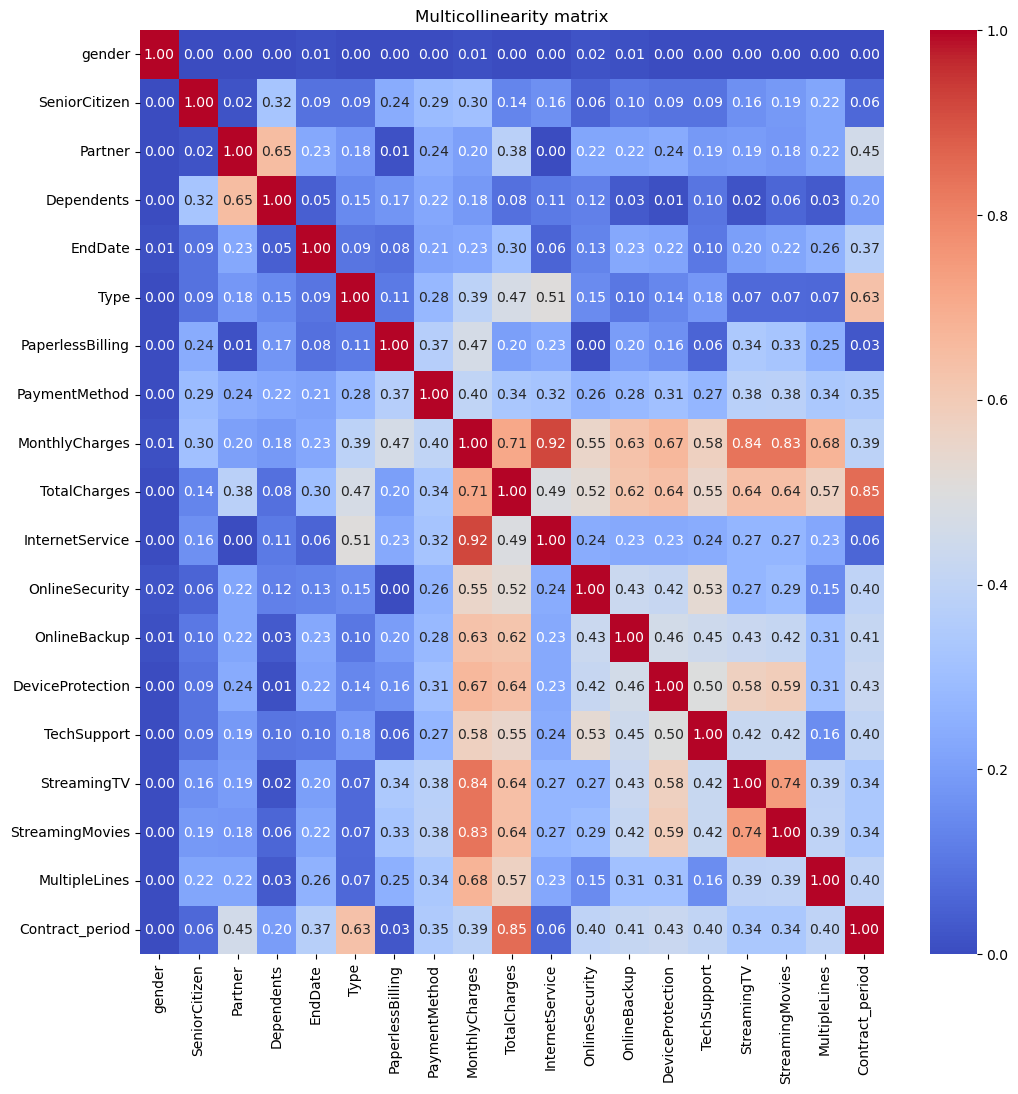

In [64]:
plt.figure(figsize=(12,12))
sns.heatmap(coll_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Multicollinearity matrix')
plt.show()


Let's note the features with correlation values of at least 0.8:
- 'MonthlyCharges' feature correlates with 'InternetService', 'StreamingTV', 'StreamingMovies'
- 'TotalCharges' feature correlates with 'Contract_period'

To eliminate feature multicollinearity, we will keep the 'MonthlyCharges' and 'Contract_period' features as they have a higher correlation with the target feature

### Preparing for model training

#### Split into train and test sets

In [65]:
features = data.drop(columns=['customerID','EndDate','InternetService','StreamingTV','StreamingMovies','TotalCharges'], axis=1)
target = data['EndDate']

In [66]:
features_train, features_test, target_train, target_test = train_test_split(
                features, target, test_size=0.25, random_state=3072023, stratify=target)

In [67]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 12 to 1958
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5282 non-null   object 
 1   SeniorCitizen     5282 non-null   int64  
 2   Partner           5282 non-null   object 
 3   Dependents        5282 non-null   object 
 4   Type              5282 non-null   object 
 5   PaperlessBilling  5282 non-null   object 
 6   PaymentMethod     5282 non-null   object 
 7   MonthlyCharges    5282 non-null   float64
 8   OnlineSecurity    5282 non-null   object 
 9   OnlineBackup      5282 non-null   object 
 10  DeviceProtection  5282 non-null   object 
 11  TechSupport       5282 non-null   object 
 12  MultipleLines     5282 non-null   object 
 13  Contract_period   5282 non-null   int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 619.0+ KB


#### OneHot encoding and scaling

In [68]:
X_num = features_train.select_dtypes(exclude='object').columns.to_list()
X_cat = features_train.drop(columns=['MonthlyCharges','Contract_period'], axis=1).columns.to_list()

In [69]:
X_num.remove('SeniorCitizen')

In [70]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[('scaler', StandardScaler())]), X_num),
        ('cat', Pipeline(steps=[('encoder', OneHotEncoder(drop='first', sparse=False))]), X_cat),
    ]
    )

In [71]:
transformed = preprocessor.fit_transform(features_train)
categorical_columns = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(X_cat)
all_features = X_num + list(categorical_columns)

In [72]:
trans_df = pd.DataFrame(transformed, columns=all_features)
trans_df

,MonthlyCharges,Contract_period,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,MultipleLines_Yes
0,1.183760,1.265756,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.339759,0.327126,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2,1.273377,0.908462,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.506656,-0.787222,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.500703,-1.141588,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0.885037,1.886628,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
5278,1.130654,-0.517787,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5279,0.665974,0.195337,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
5280,-0.484107,-1.276305,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Model training

### Logistic regression

In [73]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=3072023, solver='liblinear'))
])
scores = cross_val_score(pipeline, features_train, target_train, cv=5, scoring='roc_auc')
print("Logistic Regression: mean_cross_val_score = {:.3f}".format(scores.mean()))

Logistic Regression: mean_cross_val_score = 0.757


### Gradient boosting 

In [74]:
#pipeline = Pipeline(steps=[
#    ('classifier', CatBoostClassifier(
#        random_state=3072023,
#        cat_features=X_cat,
#        silent=True
#    ))
#])

In [75]:
#params = {
#    'classifier__iterations':range(100,1000,100),
#    'classifier__learning_rate':np.arange(0.001,0.5,0.01),
#    'classifier__depth': range(1, 15, 1) 
#}
#
#cat = RandomizedSearchCV(pipeline,
#        params,
#        scoring='roc_auc',
#        cv=5,
#        n_jobs=-1,        
#        n_iter=20)
#
#cat.fit(features_train, target_train)
#
#cat.best_params_

In [76]:
pipeline = Pipeline(steps=[
    ('classifier', CatBoostClassifier(
        learning_rate=0.41,
        iterations=500,
        depth=3,
        random_state=3072023,
        cat_features=X_cat,
        verbose=0
    ))
])
scores = cross_val_score(pipeline, features_train, target_train, cv=5, scoring='roc_auc')
print("CatBoostClassifier: mean_cross_val_score = {:.2f}".format(scores.mean()))

CatBoostClassifier: mean_cross_val_score = 0.92


Let's test the gradient boosting model on the test set

## Testing

In [77]:
pipeline.fit(features_train, target_train)
pred_probabilities = pipeline.predict_proba(features_test)[:, 1]
predictions = pipeline.predict(features_test)
print(classification_report(target_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1486
           1       0.88      0.64      0.74       275

    accuracy                           0.93      1761
   macro avg       0.91      0.81      0.85      1761
weighted avg       0.93      0.93      0.93      1761



In [78]:
print('AUC-ROC for CatBoostClassifier on the test set: ', roc_auc_score(target_test, pred_probabilities).round(2))
print('Accuracy for CatBoostClassifier on the test set: ', accuracy_score(target_test, predictions).round(2))

AUC-ROC for CatBoostClassifier on the test set:  0.93
Accuracy for CatBoostClassifier on the test set:  0.93


An accuracy of 0.93 indicates that the model correctly predicts in 93% of cases

In [79]:
fpr, tpr, thresholds = roc_curve(target_test, pred_probabilities)
roc_auc = roc_auc_score(target_test, pred_probabilities)

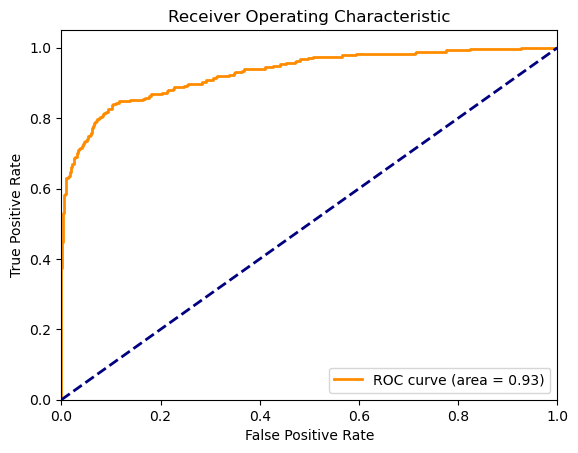

In [80]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Confusion matrix

In [81]:
c_mat = confusion_matrix(target_test, pipeline.predict(features_test))

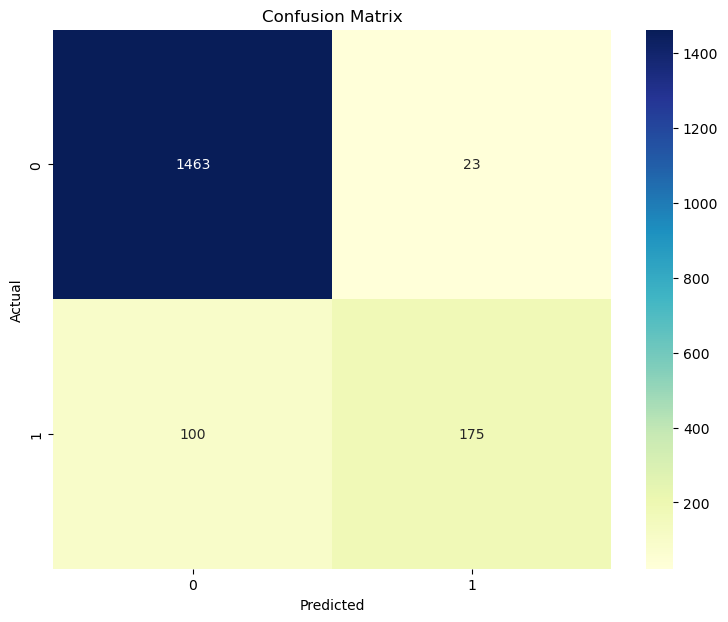

In [82]:
class_names = pipeline.classes_ 
c_mat_df = pd.DataFrame(c_mat, index=class_names, columns=class_names)

plt.figure(figsize=(9, 7))
sns.heatmap(c_mat_df, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


There are 1761 clients in the test sample. We obtained the following confusion matrix values:
- True Negative (TN) = 1463 - the quantity of retained clients predicted by the model, who actually retained  
- False Positive (FP) = 23 - the quantity of churned clients predicted by the model, who actually retained
- False Negative (FN) = 100 - the quantity of retained clients predicted by the model, who actually churned
- True Positive (TP) = 175 - the quantity of churned clients predicted by the model, who actually churned

Overall, out of 275 churned clients, the model correctly predicted 175, which is slightly over 63%.

## Features importance

In [83]:
cat = pipeline.named_steps['classifier']
cat_features = pd.DataFrame({'features': cat.feature_names_,
                             'score': cat.get_feature_importance()}).sort_values(by="score", ascending = False)


In [84]:
cat_features

,features,score
13,Contract_period,66.686645
7,MonthlyCharges,13.399388
4,Type,5.449870
6,PaymentMethod,3.481687
2,Partner,2.110947
12,MultipleLines,2.034480
9,OnlineBackup,1.627490
10,DeviceProtection,1.224388
3,Dependents,0.808388
8,OnlineSecurity,0.703406


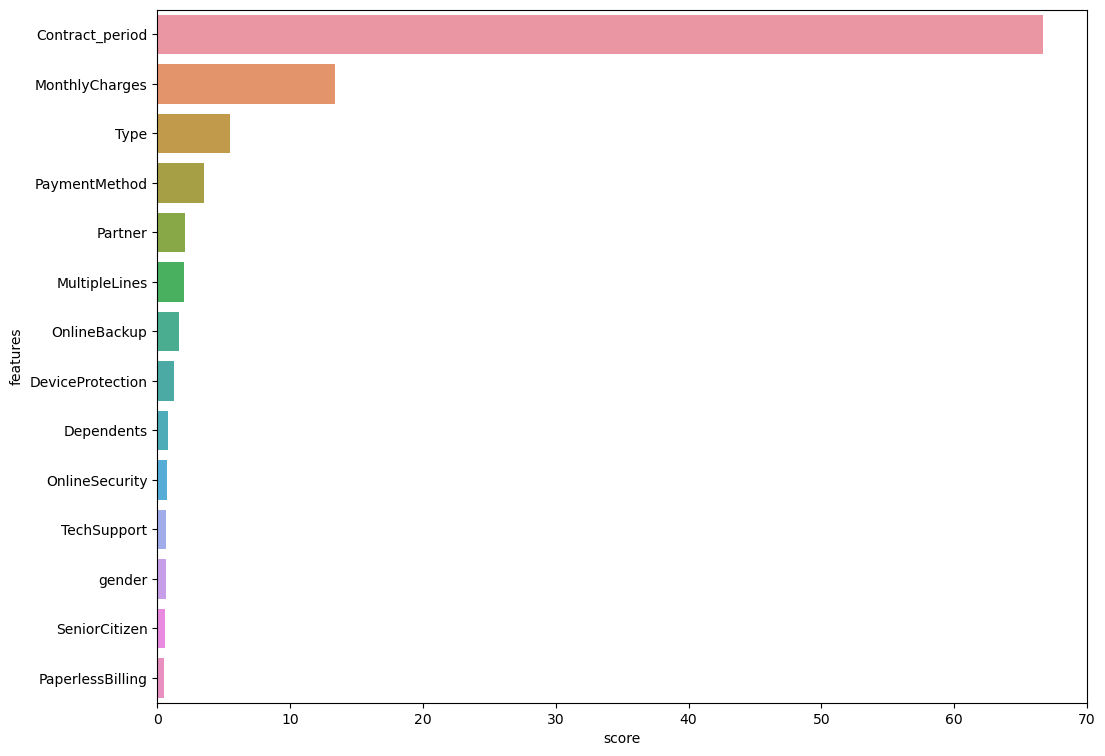

In [85]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.barplot(ax=ax, x=cat_features["score"], y=cat_features["features"])
plt.show()

The graph shows that the 'Contract_period' feature, indicated by the target variable, has the highest importance for predicting the target feature in the gradient boosting model. The 'MonthlyCharges' feature also has a significiant impact.

## Conclusion

In this project it is necessary to create a model that predicts the churn of telecom company clients to better respond to and rectify the situation. We have 4 datasets: contract information, personal data, internet and phone service information.

The following steps were taken to realize the project:
- explorary data analysis and preprocessing:
    - verifying the absense of duplicates
    - merging all datasets into a single table
    - filling missing values
    - creation a 'Contract_period' feature
    - changing data types
    - creating the target feature with two categories (1 - client churned, 2 - client didn't churn)
    - exploring class distribution (1: 14%, 0: 86%)
    - examining features distribution
    - correlation analysis, identifying highly correlated features
    - split the dataset into train and test sets
    - encoding categorical features by OneHotEncoder and scaling numerical features for training logistic regression model
- training two models: logistic regression and gradient boosting. The best model was the gradent boosting model with an AUC-ROC metric 0f 0.93
- additinally, assessed the accuracy metric: 0.93 (the model makes correct predictions in 93% of cases)
- the confusion matrix showed that out of 275 churned clients the model correctly predicted approximately 64% of cases
- among the features, the 'Contract_period' and 'MonthlyCharges' were found to be most significant

## Project Report

### Steps undertaken for the project

To implement the project, the followinh steps were planned and carried out:
- exploratory analysis and data preprocessing:
    - checking for duplicates
    - merging data into a single table
    - filling in missing values
    - creating additional features
    - changing data types
    - investigating class balance
    - studying the distribution of features
    - studying features correlations
    - removing features that do not positively influence model training
    - spliting the dataset into train and test sets
    - encoding and scaling features
- model evaluation (two algorithms):
- slecting the best model based on AUC-ROC metric and testing it
- evaluating the Accuracy metric
- evaluating the confusion matrix
- assessing feature importance

### Analysis of actual work against planned steps

Work was generaly carried out in accordance with planned steps

Differences:
- additionally, the confusion matrix and Accuracy metric were analyzed

### Difficulties and their solutions

The main difficulty was determining which features had a significant impact on model training.

The solution involved analyzing the distribution and correlation of features.

### List of features for model training

The final list of features for model training:
- categorical:
    - gender
    - SeniorCitizen
    - Partner
    - Dependents
    - Type
    - PaperlessBilling
    - PaymentMethod
    - OnlineSecurity
    - OnlineBackup
    - DeviceProtection
    - TechSupport
    - MultipleLines
- numerical:
    - MonthlyCharges
    - Contract_period
    
For the logistic regression model categorical features were encoded using the OneHot technique. The numerical features were scaled.

For the gradient boost model encoding of categorical features was performed using the built-in CatBoost methods.

### Description of data preprocessing

The following steps were completed:
- all datasets were merged into a single table by the customers ID, with missing values in Internet adn phone services filled with value 'No'
- data types were changed:
    - 'TotalCharges' was converted from object to numeric
    - 'BeginDate' was converted from object to datetime
- a feature 'Contract_period' was created and feature 'BeginDate' was removed
- a target feature with two classes was created (1 - the client left, 0 - the client stayed)
- the class balance was investigated (positive - 14%, negative - 86%)
- the distribution of features was investigated. The features there is a significant difference in the propotion of churned customers:
    - marital status (more churn among married)
    - payment type (one/two years)
    - payment method (bank transfres)
    - connection type (fiber optic)
    - monthly payment: starting form 80
    - total payment: from 1000 to 5000
    - contract period: from 400 to 1700
- correlation analysis was preformed to identify multicollinear features:
    - 'MonthlyCharges' feauture correlates with 'InternetService', StreamingTV' and 'StreamingMovies'
    - 'TotalChrges' correlates with 'Contract_period'
- to address multicollinearity the 'Monthly Charged' and 'Contract_period' were retained and other highly correlated with its were removed
- the dataset was split into train and test sets (3:1 ratio)
- categorical features were encoding by OneHot and numerical features were scaled for logistic regresion model training

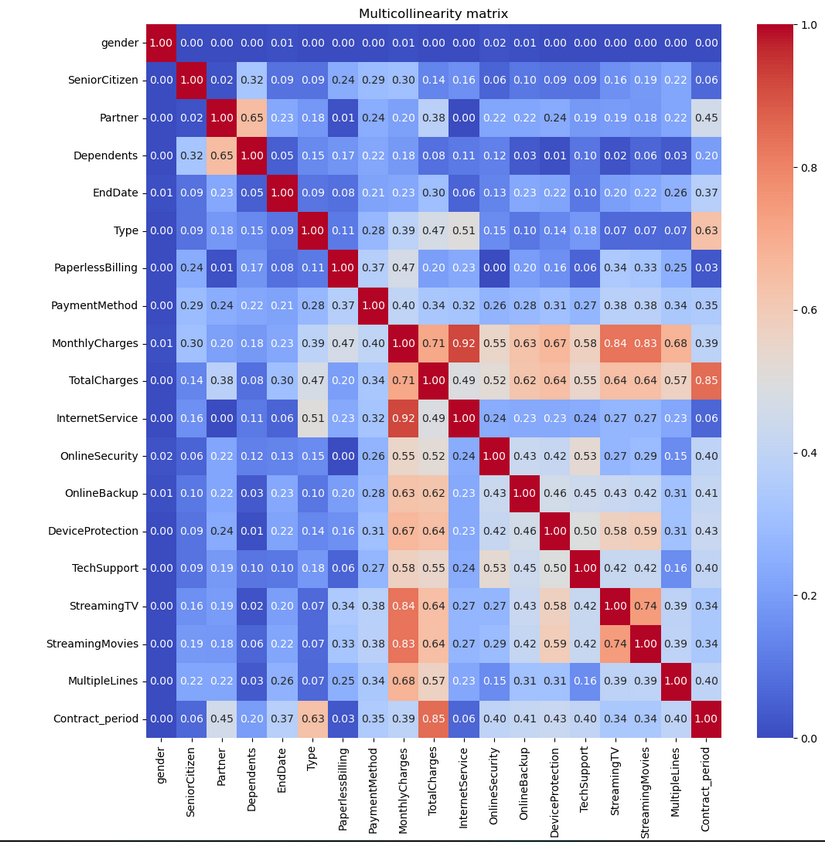

### Model research

Tho models were studied:
- Logistic Regression
- Gradient boosting (CatBoost)

The best model was CatBoost with the following hyperparameters:
- learning rate: 0.41
- depth: 3
- iterations: 500

The AUC-ROC metric for cross-validation: 0.93
On the test set:
- AUC-ROC: 0.93
- Accuracy: 0.93 indicates that the model correctly predicts in 93% of cases

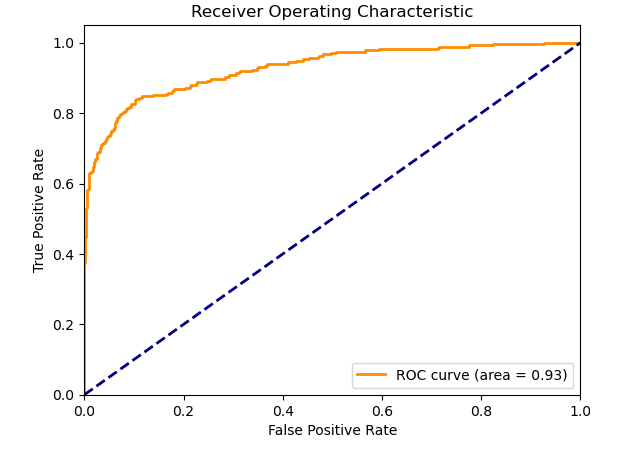

### Confusion matrix

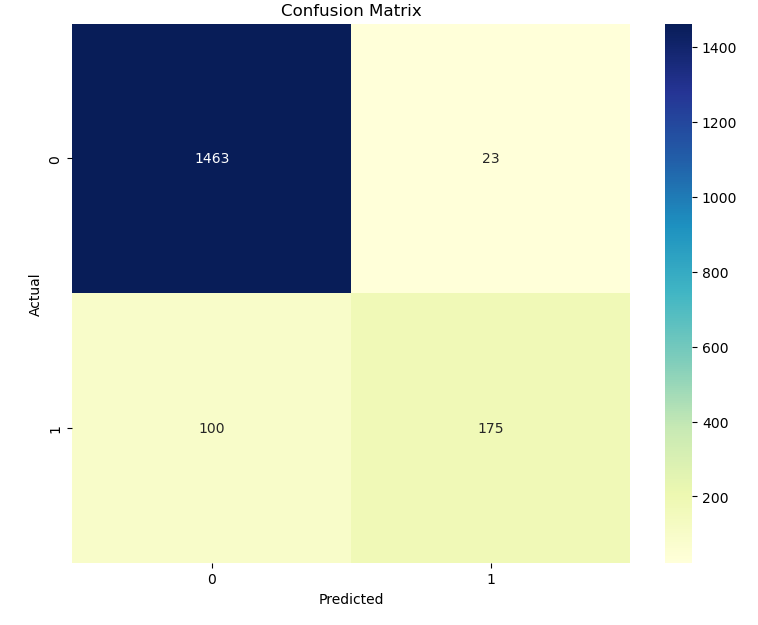

There are 1761 clients in the test sample. We obtained the following confusion matrix values:
- True Negative (TN) = 1463 - the quantity of retained clients predicted by the model, who actually retained  
- False Positive (FP) = 23 - the quantity of churned clients predicted by the model, who actually retained
- False Negative (FN) = 100 - the quantity of retained clients predicted by the model, who actually churned
- True Positive (TP) = 175 - the quantity of churned clients predicted by the model, who actually churned

From these values, we can calculate the following metrics:
- Precision (88.4%): proportion of actual churned among predicted churned
- Recall or TPR (63.7%): proportion of predicted churned among actual churned
- FPR (1.5%): proportion of predicted churned among actual retained

### Features importance

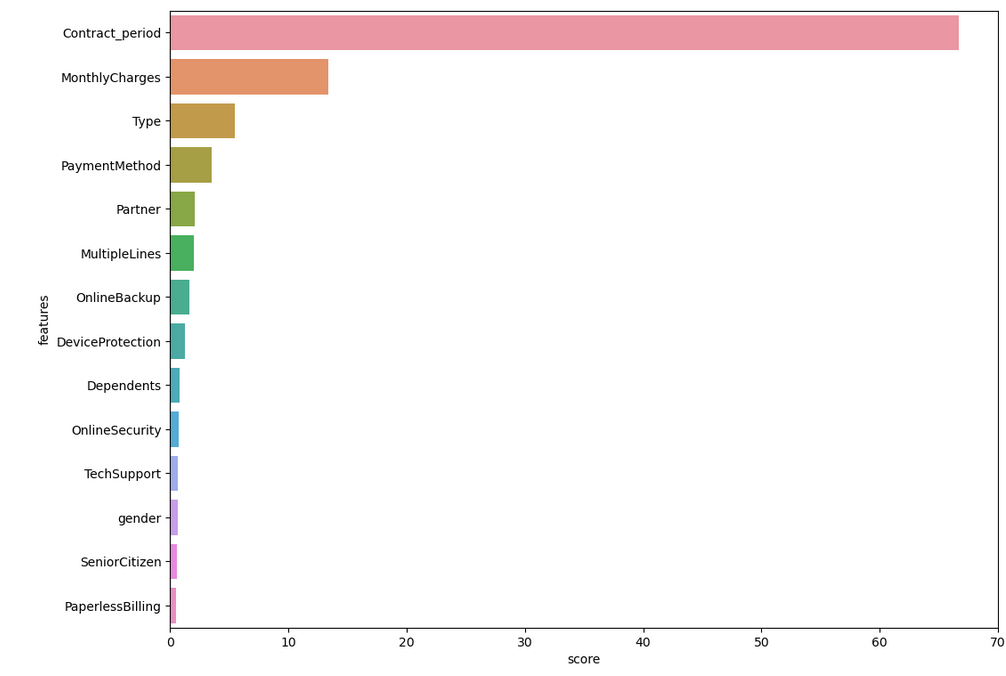

The graph shows that the feature of contrat period has the greatest importance for predicting the target feature in the gradient boosting model. 